# Imports 

In [34]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
#df = pd.read_csv('data/Kickstarter000.csv')
li = []
for i in range(0,56):
    li.append(pd.read_csv(f'data/Kickstarter0{str(i).zfill(2)}.csv'))
df = pd.concat(li, axis=0, ignore_index = True)

In [66]:
df.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",802.0,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",2259.0,international


In [4]:
df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [3]:
df.source_url.unique()

array(['https://www.kickstarter.com/discover/categories/music/rock',
       'https://www.kickstarter.com/discover/categories/art/mixed%20media',
       'https://www.kickstarter.com/discover/categories/photography',
       'https://www.kickstarter.com/discover/categories/fashion/footwear',
       'https://www.kickstarter.com/discover/categories/technology/software',
       'https://www.kickstarter.com/discover/categories/fashion',
       'https://www.kickstarter.com/discover/categories/publishing/nonfiction',
       'https://www.kickstarter.com/discover/categories/art/sculpture',
       'https://www.kickstarter.com/discover/categories/games/playing%20cards',
       'https://www.kickstarter.com/discover/categories/food/restaurants',
       'https://www.kickstarter.com/discover/categories/theater',
       'https://www.kickstarter.com/discover/categories/music/classical%20music',
       'https://www.kickstarter.com/discover/categories/food/small%20batch',
       'https://www.kickstarter.co

In [21]:
df.category[0].get(slug)

AttributeError: 'str' object has no attribute 'get'

In [12]:
df.photo.isnull().count()

209222

In [16]:
df.blurb[0]

'2006 was almost 7 years ago.... Can you believe how fast time has flown by? But after all this time... the new album is finally ready.'

In [17]:
df.describe().round()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.0,209222.0,2.092220e+05,2.092220e+05,209222.0,209222.0,2.092220e+05,2.092220e+05,209222.0,2.092220e+05,209222.0,209222.0
mean,145.0,12893.0,1.456089e+09,1.463033e+09,1.0,49176.0,1.073222e+09,1.460206e+09,18814.0,1.462838e+09,1.0,12892.0
std,886.0,88894.0,6.339711e+07,6.305618e+07,0.0,1179427.0,6.198051e+08,6.309029e+07,322960.0,6.290421e+07,0.0,88901.0
min,0.0,0.0,1.240366e+09,1.241334e+09,0.0,0.0,8.624000e+03,1.240603e+09,0.0,1.241334e+09,0.0,0.0
25%,4.0,106.0,1.413317e+09,1.420607e+09,1.0,1500.0,5.351054e+08,1.417639e+09,110.0,1.420485e+09,1.0,106.0
50%,27.0,1537.0,1.457895e+09,1.464754e+09,1.0,5000.0,1.074579e+09,1.461924e+09,1556.0,1.464709e+09,1.0,1537.0
75%,89.0,6548.0,1.511595e+09,1.519437e+09,1.0,15000.0,1.609369e+09,1.516694e+09,6887.0,1.519366e+09,1.0,6550.0
max,105857.0,8596474.0,1.552527e+09,1.557721e+09,2.0,100000000.0,2.147476e+09,1.552537e+09,81030744.0,1.552537e+09,2.0,8596475.0


In [4]:
#format deadline, created at, launched at, stated_changed_at

#deadline
df.deadline = pd.to_datetime(df.deadline, unit='s')
df.deadline = df.deadline.dt.date

In [5]:
#created at
df.created_at = pd.to_datetime(df.created_at, unit='s')
df.created_at = df.created_at.dt.date

#launched at 
df.launched_at = pd.to_datetime(df.launched_at, unit='s')
df.launched_at = df.launched_at.dt.date

#state_changed_at
df.state_changed_at = pd.to_datetime(df.state_changed_at, unit='s')
df.state_changed_at = df.state_changed_at.dt.date

In [6]:
#check difference between created_at & launched_at 
for x in range(1,20):
    print(df.launched_at[x] - df.created_at[x])

5 days, 0:00:00
9 days, 0:00:00
3 days, 0:00:00
2 days, 0:00:00
22 days, 0:00:00
4 days, 0:00:00
211 days, 0:00:00
45 days, 0:00:00
22 days, 0:00:00
43 days, 0:00:00
14 days, 0:00:00
1 day, 0:00:00
32 days, 0:00:00
0:00:00
10 days, 0:00:00
4 days, 0:00:00
473 days, 0:00:00
10 days, 0:00:00
89 days, 0:00:00


In [7]:
#creat new columns (days_total, days_until_success, days_until_launch )
#df.eval("days_until_launch = launched_at - created_at", inplace=True) -> not working because kernel dies 
#df.eval("days_until_success = created_at - state_changed_at", inplace=True)
#df.eval("days_total = created_at - deadline", inplace=True)
df['days_until_launch'] = df.apply(lambda row: row.launched_at - row.created_at, axis = 1) 

In [19]:
df['days_until_success'] = df.apply(lambda row: row.state_changed_at - row.created_at, axis = 1) 
df['days_total'] = df.apply(lambda row: row.deadline - row.created_at, axis = 1) 
df['days_diff_total_success'] = df.apply(lambda row: row.days_total - row.days_until_success, axis = 1) 

In [20]:
df.iloc[75]

backers_count                                                              12
blurb                       WE HAVE DECIDED TO CANCEL FUNDING AND MOVE OUR...
category                    {"id":24,"name":"Performance Art","slug":"art/...
converted_pledged_amount                                                  811
country                                                                    US
created_at                                                         2015-06-13
creator                     {"id":1876216545,"name":"kelly shaw willman (d...
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                           2015-07-16
disable_communication                                           

DataError: No numeric types to aggregate

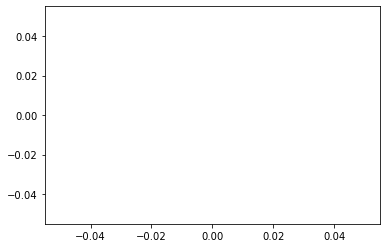

In [49]:
sns.lineplot(x=df.days_until_success, y=df.state, hue=df.state)

DataError: No numeric types to aggregate

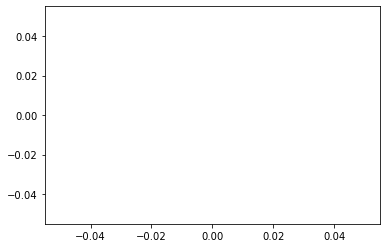

In [55]:
sns.lineplot(x=df.days_total, y=df.state[0].count)

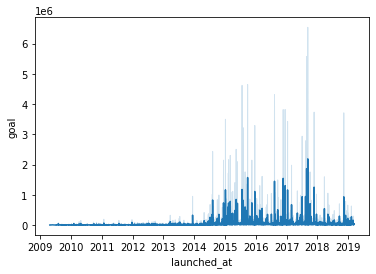

In [63]:
sns.lineplot(y=df.goal, x=df.launched_at);

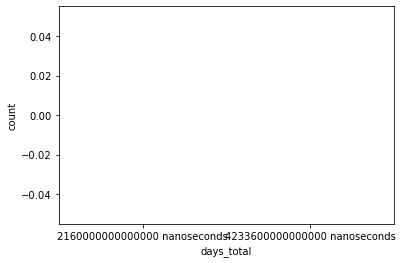

In [69]:
sns.countplot(df.days_total[0:2])

In [66]:
sns.pairplot(df, hue='state', size=2.5);

C:\Users\svenr\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\svenr\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\svenr\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\svenr\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\svenr\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\svenr\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWar

Error in callback <function flush_figures at 0x000001E54001E040> (for post_execute):


KeyboardInterrupt: 

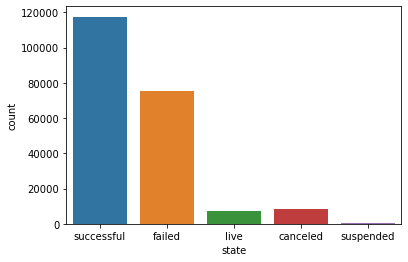

In [29]:
sns.countplot(x=df.state);

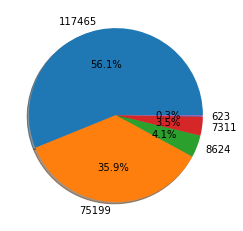

In [47]:
fig1, ax1 = plt.subplots()
ax1.pie(df.state.value_counts(),labels=df.state.value_counts(), autopct='%1.1f%%', shadow=True)
plt.show()
